In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [15]:
data = load_iris()


In [16]:
# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset with appropriate column names
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, names=columns)

In [17]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


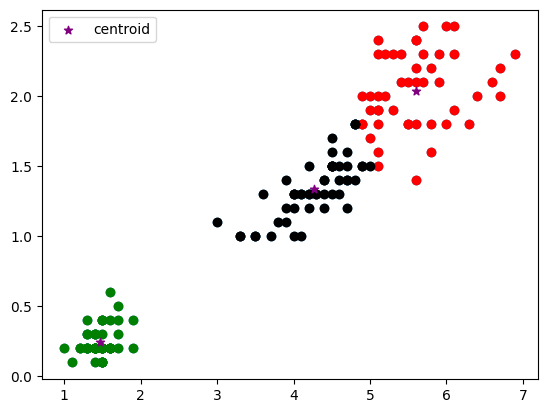

In [36]:
# performing the clustering without the scaling 
plt.scatter(iris_df['petal_length'], iris_df['petal_width'])



km = KMeans(n_clusters=3)
iris_df['clusters'] = km.fit_predict(iris_df[['petal_length', 'petal_width']])

df1 = iris_df[iris_df.clusters==0]
df2 = iris_df[iris_df.clusters==1]
df3 = iris_df[iris_df.clusters==2]
plt.scatter(df1.petal_length,df1['petal_width'],color='green')
plt.scatter(df2.petal_length,df2['petal_width'],color='red')
plt.scatter(df3.petal_length,df3['petal_width'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()



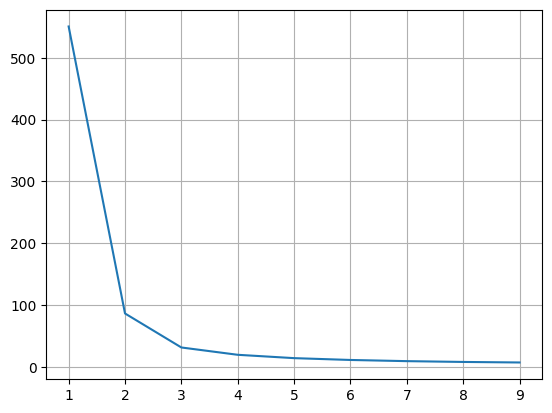

In [33]:
sse = []
kn = range(1, 10)

for k in kn:
    km = KMeans(n_clusters=k)
    km.fit(iris_df[['petal_length', 'petal_width']])
    sse.append(km.inertia_)
    
# identifying the best value of k
plt.plot(kn, sse)
plt.grid()


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns

# Load the Iris dataset
iris_df = sns.load_dataset('iris')

# Scale the numeric features
scaler = MinMaxScaler()
iris_df[iris_df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    iris_df.select_dtypes(include=['float64', 'int64'])
)

# Prepare the data (excluding the species column)
X = iris_df.drop('species', axis=1)

# Apply KMeans and calculate Silhouette Score for different cluster sizes
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {score:.3f}")

# Optional: Fit the best model and inspect the cluster assignments
best_k = 3  # Known from Iris dataset structure
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
iris_df['cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with cluster assignments
print("\nIris dataset with cluster assignments:")
print(iris_df.head())


Silhouette Score for 2 clusters: 0.630
Silhouette Score for 3 clusters: 0.505
Silhouette Score for 4 clusters: 0.445
Silhouette Score for 5 clusters: 0.353
Silhouette Score for 6 clusters: 0.355
Silhouette Score for 7 clusters: 0.338
Silhouette Score for 8 clusters: 0.328
Silhouette Score for 9 clusters: 0.319
Silhouette Score for 10 clusters: 0.334

Iris dataset with cluster assignments:
   sepal_length  sepal_width  petal_length  petal_width species  cluster
0      0.222222     0.625000      0.067797     0.041667  setosa        0
1      0.166667     0.416667      0.067797     0.041667  setosa        0
2      0.111111     0.500000      0.050847     0.041667  setosa        0
3      0.083333     0.458333      0.084746     0.041667  setosa        0
4      0.194444     0.666667      0.067797     0.041667  setosa        0


In [39]:

# Load the Iris dataset
iris_df = sns.load_dataset('iris')
# Prepare the data (excluding the species column)
X = iris_df.drop('species', axis=1)

# Apply KMeans and calculate Silhouette Score for different cluster sizes
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {score:.3f}")

# Optional: Fit the best model and inspect the cluster assignments
best_k = 3  # Known from Iris dataset structure
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
iris_df['cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with cluster assignments
print("\nIris dataset with cluster assignments:")
print(iris_df.head())


Silhouette Score for 2 clusters: 0.681
Silhouette Score for 3 clusters: 0.553
Silhouette Score for 4 clusters: 0.498
Silhouette Score for 5 clusters: 0.491
Silhouette Score for 6 clusters: 0.365
Silhouette Score for 7 clusters: 0.354
Silhouette Score for 8 clusters: 0.349
Silhouette Score for 9 clusters: 0.313
Silhouette Score for 10 clusters: 0.318

Iris dataset with cluster assignments:
   sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1


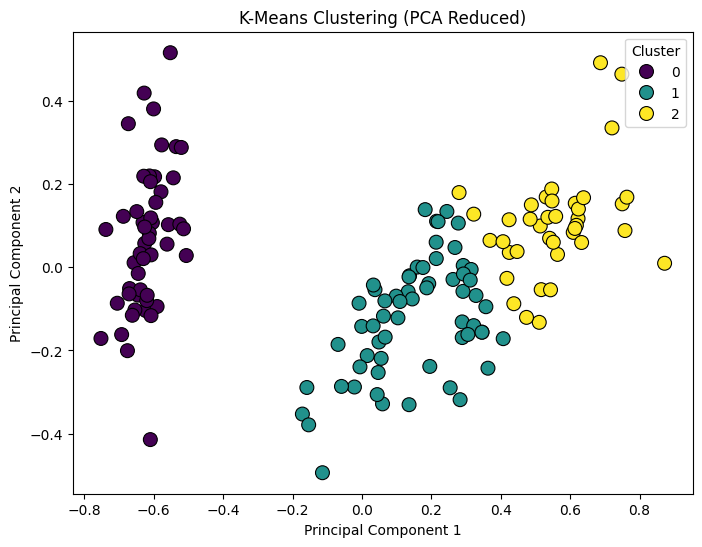

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the Iris dataset
iris_df = sns.load_dataset('iris')

# Scale the features
scaler = MinMaxScaler()
iris_df[iris_df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    iris_df.select_dtypes(include=['float64', 'int64'])
)

# Prepare the data (excluding species column)
X = iris_df.drop(columns=['species'])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
iris_df['cluster'] = kmeans.fit_predict(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = iris_df['cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=pca_df['cluster'], palette='viridis', s=100, edgecolor='black')
plt.title("K-Means Clustering (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


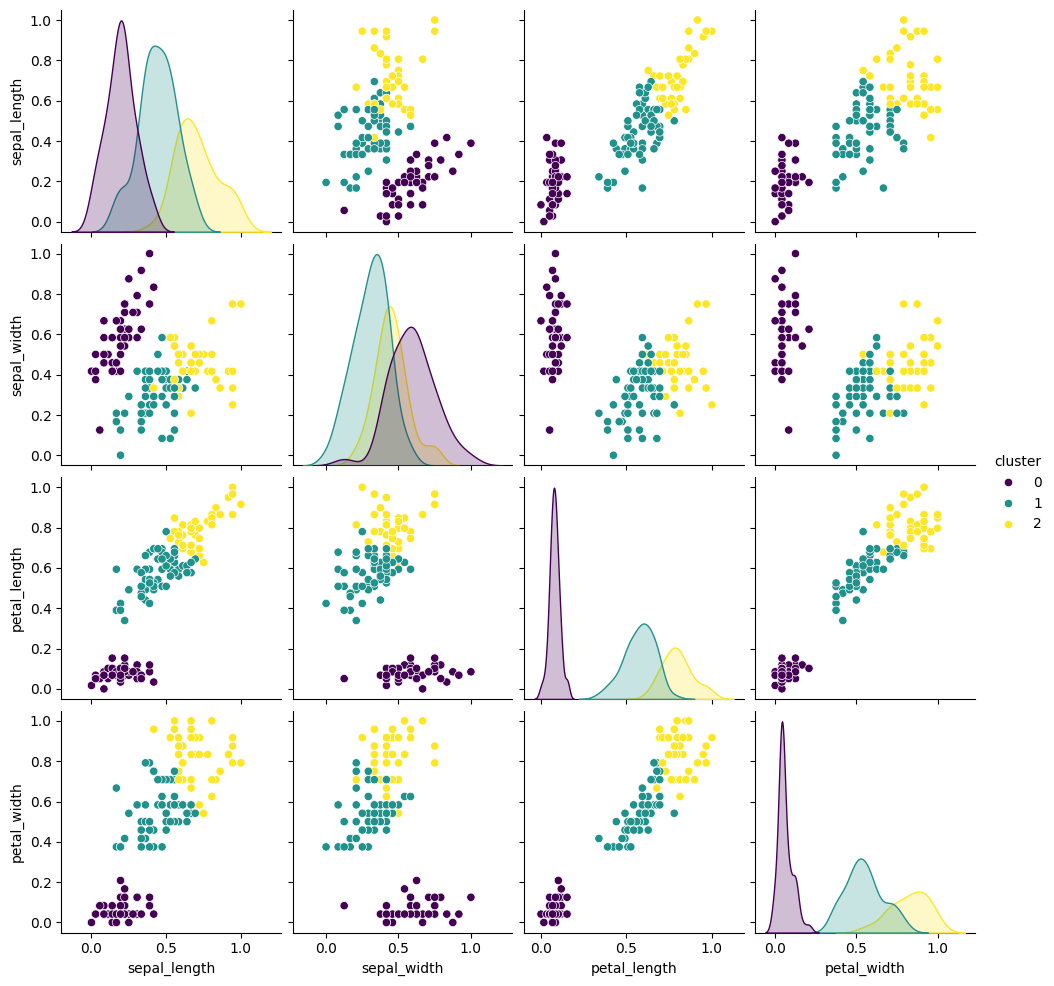

In [42]:
sns.pairplot(iris_df, hue="cluster", palette="viridis", diag_kind="kde")
plt.show()


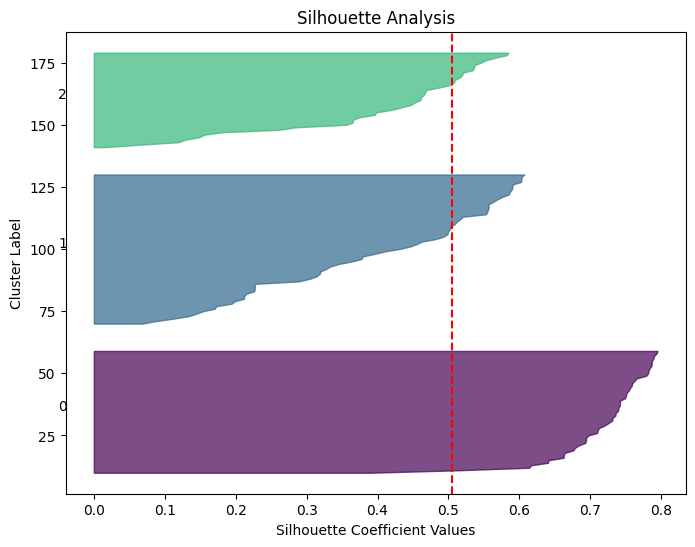

In [43]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute Silhouette Scores
cluster_labels = iris_df['cluster']
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Plot Silhouette Analysis
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(3):  # Assuming k=3
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.viridis(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Analysis")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
# Scale the numeric features
from sklearn.preprocessing import StandardScaler


# Load the dataset
iris_df = sns.load_dataset('iris')


# Use StandardScaler instead of MinMaxScaler
scaler = StandardScaler()
iris_df[iris_df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    iris_df.select_dtypes(include=['float64', 'int64'])
)


# Prepare data by dropping the categorical 'species' column
X = iris_df.drop(columns=['species'])

# Compute silhouette scores for different k values
silhouette_scores = {}
for k in range(2, 11):  # Try k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Find the best k with the highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters: k={best_k} with silhouette score: {silhouette_scores[best_k]:.3f}")


Silhouette Score for k=2: 0.582
Silhouette Score for k=3: 0.460
Silhouette Score for k=4: 0.387
Silhouette Score for k=5: 0.346
Silhouette Score for k=6: 0.317
Silhouette Score for k=7: 0.320
Silhouette Score for k=8: 0.339
Silhouette Score for k=9: 0.342
Silhouette Score for k=10: 0.352

Optimal number of clusters: k=2 with silhouette score: 0.582
